In [1]:
import pandas as pd
import numpy as np
import bisect
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from tqdm import tqdm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

| 항목 | 설명     |
|-----|----------|
| X1  | 작업번호 |
| X2  | 마킹길이 |
| X3  | 절단길이 |
| X4  | 철판두께 |
| X5  | 철판재질 |
| X6  | 절단갯수 |
| X7  | 작업장   |
| X8  | 작업자   |
| Y1  | 마킹시간 |
| Y2  | 절단시간 |


In [2]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\train.csv')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\test.csv')

display(train.head())
display(test.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,134764,56.3,67.5,22.5,AH32,4,97,PL973,467,2241
1,9854,115.0,67.0,13.0,AH32,2,27,PL271,1058,1163
2,94365,59.2,44.6,18.0,AH32-TM,1,14,PL141,270,1094
3,110641,52.1,97.4,15.0,A,17,24,PL242,391,2604
4,100159,42.9,58.7,14.5,A,4,23,PL233,232,1564


,Id,X1,X2,X3,X4,X5,X6,X7,X8
0,0,158065,80.6,104.8,11.0,A,29,23,PL234
1,1,65927,141.8,34.2,17.5,A,2,91,PL911
2,2,117029,77.2,103.3,17.0,A,10,97,PL973
3,3,50866,95.5,131.0,18.0,A,2,23,PL234
4,4,151900,91.7,36.1,19.0,AH32,1,27,PL271


In [4]:
train = train.rename(columns={'X1': '작업번호',
                        'X2': '마킹길이',
                        'X3': '절단길이',
                        'X4': '철판두께',
                        'X5': '철판재질',
                        'X6': '절단갯수',
                        'X7': '작업장',
                        'X8': '작업자',
                        'Y1': '마킹시간',
                        'Y2': '절단시간'})

test = test.rename(columns = {'X1': '작업번호',
                        'X2': '마킹길이',
                        'X3': '절단길이',
                        'X4': '철판두께',
                        'X5': '철판재질',
                        'X6': '절단갯수',
                        'X7': '작업장',
                        'X8': '작업자',
                        'Y1': '마킹시간',
                        'Y2': '절단시간'})

In [8]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121754 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   작업번호    121754 non-null  int64  
 1   마킹길이    121754 non-null  float64
 2   절단길이    121754 non-null  float64
 3   철판두께    121754 non-null  float64
 4   철판재질    121754 non-null  object 
 5   절단갯수    121754 non-null  int64  
 6   작업장     121754 non-null  int64  
 7   작업자     121754 non-null  object 
 8   마킹시간    121754 non-null  int64  
 9   절단시간    121754 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 9.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40571 entries, 0 to 40570
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   작업번호    40571 non-null  int64  
 1   마킹길이    40571 non-null  float64
 2   절단길이    40571 non-null  float64
 3   철판두께    40571 non-null  float64
 4   철판재질    40571 non-null  object 
 5   절단갯수    40571 non-null  int64  
 6   작업장     40571 non-null  int64  
 7   작업자     40571 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ MB


None

In [6]:
test.drop(columns = ['작업번호'], inplace = True)

In [5]:
categorical_features = ['철판재질', '작업자']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

Encoding features:   0%|          | 0/2 [00:00<?, ?it/s]

Encoding features: 100%|██████████| 2/2 [00:00<00:00, 28.66it/s]


In [ ]:
ms.matrix(train)

In [ ]:
# train['X8'] = train['X8'].astype(str).str.extract(r'(PL|PS)')
# test['X8'] = test['X8'].astype(str).str.extract(r'(PL|PS)')

In [ ]:
# pl_data = train[train['X8'] == 'PL']
# ps_data = train[train['X8'] == 'PS']

# # 작업장 별로 PL과 PS의 박스 플롯 그리기
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='X7', y='X8', data=pl_data, palette='pastel')
# plt.title('Box Plot of PL by Workstation')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='X7', y='X8', data=ps_data, palette='pastel')
# plt.title('Box Plot of PS by Workstation')
# plt.show()

In [ ]:
# plt.figure(figsize = (10, 10))
# sns.heatmap(train.corr(), vmax = 1, vmin = -1, annot = True)

In [ ]:
# sns.pairplot(train)

In [ ]:
features = train.columns
numeric_features = train.select_dtypes('number').columns

for i in numeric_features:
    plt.figure(figsize=(15, 5))
    plt.tight_layout()

    f, (ax_box, ax_hist, ax_violin) = plt.subplots(3, sharex=True, gridspec_kw={'height_ratios': (0.2, 1, 1)})

    sns.boxplot(train[i], ax=ax_box, linewidth=0.5)

    sns.histplot(train[i], ax=ax_hist, bins=50, kde=True)
    ax_hist.set_title(f'{i} - Histogram', fontsize=12) 

    sns.violinplot(data=train, y=i, ax=ax_violin, inner='quartile')

    ax_violin.set_xlabel('')

    ax_box.set_title(f'{i} - Box Plot', fontsize=12)
    ax_violin.set_title(f'{i} - Violin Plot', fontsize=12)

    ax_box.set_xlabel('')

    ax_violin.set_ylabel('')
    ax_hist.set_ylabel('Frequency') 

    ax_violin.yaxis.label.set_size(10)

    plt.subplots_adjust(hspace=0.4)

In [10]:
print(f'numeric cols : {len(numeric_features)}')
print(f'{numeric_features}')

fig, ax = plt.subplots(4, 3, figsize=(15, 5))

for i in range(len(numeric_features)):

    x = i // 3    
    y = i % 3
    
    sns.histplot(x=numeric_features[i], data = train, bins = 75, ax = ax[x,y])
    ax[x, y].set_title(numeric_features[i])

plt.suptitle('Numerical Variance distribtion\n\n')
plt.tight_layout()

NameError: name 'numeric_features' is not defined

In [7]:
# drop_indices = train[(train['Y1'] >= 2500) |
#                      (train['Y2'] >= 20000) |
#                      (train['X2'] >= 500) |
#                      (train['X4'] > 40) |
#                      (train['X6'] >= 265)].index

# train = train.drop(drop_indices)
# train = train[(train['Y1'] > 150) & (train['Y1'] <= 67000) & (train['Y2'] > 150) & (train['Y2'] <= 67000)]

def remove_outliers_with_k(column, k=1.5):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (k * IQR)
    upper_bound = Q3 + (k * IQR)
    return (column >= lower_bound) & (column <= upper_bound)

train = train[remove_outliers_with_k(train['마킹시간'], k=5) & remove_outliers_with_k(train['절단시간'], k=5)]

train = train[(train['마킹길이'] <= 445.300000) | (train['절단길이'] <= 621.300000) | (train['철판두께'] <= 36.000000) | (train['절단갯수'] <= 262.000000) | (train['마킹시간'] == 0) | (train['절단시간'] == 0)] 

train = train.reset_index(drop=True)

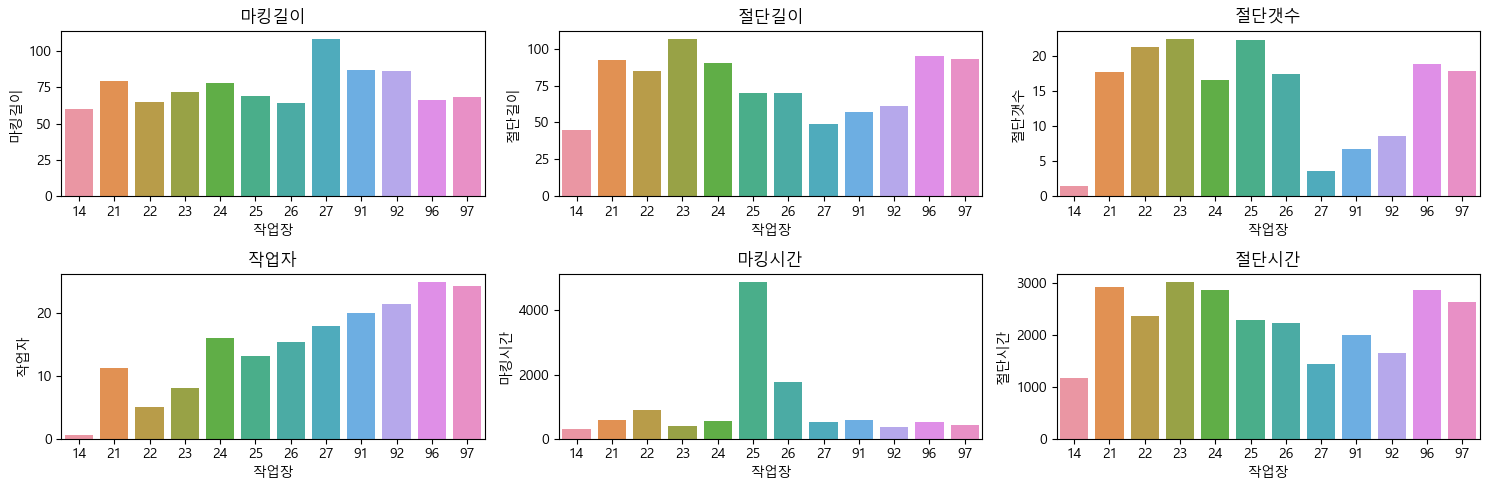

In [13]:
# data = train.groupby('작업장').mean().reset_index()

# fig, axes = plt.subplots(3, 3, figsize=(15, 5))

# sns.barplot(x = '작업장', y = '작업번호', data = data, ax = axes[0, 0])
# axes[0, 0].set_title('작업번호')

# sns.barplot(x = '작업장', y = '마킹길이', data = data, ax = axes[0, 1])
# axes[0, 1].set_title('마킹길이')

# sns.barplot(x = '작업장', y = '절단길이', data = data, ax = axes[0, 2])
# axes[0, 2].set_title('절단길이')

# sns.barplot(x = '작업장', y = '철판두께', data = data, ax = axes[1, 0])
# axes[1, 0].set_title('철판두께')

# sns.barplot(x = '작업장', y = '철판재질', data = data, ax = axes[1, 1])
# axes[1, 1].set_title('철판재질')

# sns.barplot(x = '작업장', y = '절단갯수', data = data, ax = axes[1, 2])
# axes[1, 2].set_title('절단갯수')

# sns.barplot(x = '작업장', y = '작업자', data= data, ax= axes[2, 0])
# axes[2, 0].set_title('작업자')

# sns.barplot(x = '작업장', y = '마킹시간', data = data, ax = axes[2, 1])
# axes[2, 1].set_title('마킹시간')

# sns.barplot(x = '작업장', y = '절단시간', data = data, ax = axes[2, 2])
# axes[2, 2].set_title('절단시간')

# plt.tight_layout()

data = train.groupby('작업장').mean().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.barplot(x = '작업장', y = '마킹길이', data = data, ax = axes[0, 0])
axes[0, 0].set_title('마킹길이')

sns.barplot(x = '작업장', y = '절단길이', data = data, ax = axes[0, 1])
axes[0, 1].set_title('절단길이')

sns.barplot(x = '작업장', y = '절단갯수', data = data, ax = axes[0, 2])
axes[0, 2].set_title('절단갯수')

sns.barplot(x = '작업장', y = '작업자', data= data, ax= axes[1, 0])
axes[1, 0].set_title('작업자')

sns.barplot(x = '작업장', y = '마킹시간', data = data, ax = axes[1, 1])
axes[1, 1].set_title('마킹시간')

sns.barplot(x = '작업장', y = '절단시간', data = data, ax = axes[1, 2])
axes[1, 2].set_title('절단시간')

plt.tight_layout()

| 항목 | 설명     |
|-----|----------|
| X1  | 작업번호 |
| X2  | 마킹길이 |
| X3  | 절단길이 |
| X4  | 철판두께 |
| X5  | 철판재질 |
| X6  | 절단갯수 |
| X7  | 작업장   |
| X8  | 작업자   |
| Y1  | 마킹시간 |
| Y2  | 절단시간 |


In [ ]:
mmtime = train.groupby('X5')['Y1'].mean()
mctime = train.groupby('X5')['Y2'].mean()

wmtime = train.groupby('X7')['Y1'].mean()
wctime = train.groupby('X7')['Y2'].mean()

manmtime = train.groupby('X8')['Y1'].mean()
manctime = train.groupby('X8')['Y2'].mean()

train['X5_mmtime'] = train['X5'].map(mmtime)
train['X5_mctime'] = train['X5'].map(mctime)

train['X7_wmtime'] = train['X7'].map(wmtime)
train['X7_wctime'] = train['X7'].map(wctime)

train['X8_manmtime'] = train['X8'].map(manmtime)
train['X8_manctime'] = train['X8'].map(manctime)

test['X5_mmtime'] = test['X5'].map(mmtime)
test['X5_mctime'] = test['X5'].map(mctime)

test['X7_wmtime'] = test['X7'].map(wmtime)
test['X7_wctime'] = test['X7'].map(wctime)

test['X8_manmtime'] = test['X8'].map(manmtime)
test['X8_manctime'] = test['X8'].map(manctime)

train['Velo_cutting'] = train['X3'] / train['X4']
train['Velo_marking'] = train['X2'] / train['X4']

test['Velo_cutting'] = test['X3'] / test['X4']
test['Velo_marking'] = test['X2'] / test['X4']

train['Feed_cutting'] = train['Velo_cutting'] * train['X6']
train['Feed_marking'] = train['Velo_marking'] * train['X6']

test['Feed_cutting'] = test['Velo_cutting'] * test['X6']
test['Feed_marking'] = test['Velo_marking'] * test['X6']

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['X6'].astype('category'), legend = None)

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['X7'].astype('category'), legend = None)

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['X5'].astype('category'), legend = None)

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['X4'].astype('category'), legend = None)

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['Y1'].astype('category'), legend = None)

In [ ]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['Y2'].astype('category'), legend = None)

In [ ]:
bins = [0, 15, 40, 70, 95, 110, float('inf')]

labels = [0, 1, 2, 3, 4, 5]

train['X6_category'] = pd.cut(train['X6'], bins = bins, labels = labels, include_lowest = True)
test['X6_category'] = pd.cut(test['X6'], bins = bins, labels = labels, include_lowest = True)

train.drop(columns = ['X6'], inplace = True)
test.drop(columns = ['X6'], inplace = True)

sns.scatterplot(x=train['X2'], y=train['X3'], hue = train['X6_category'].astype('category'))

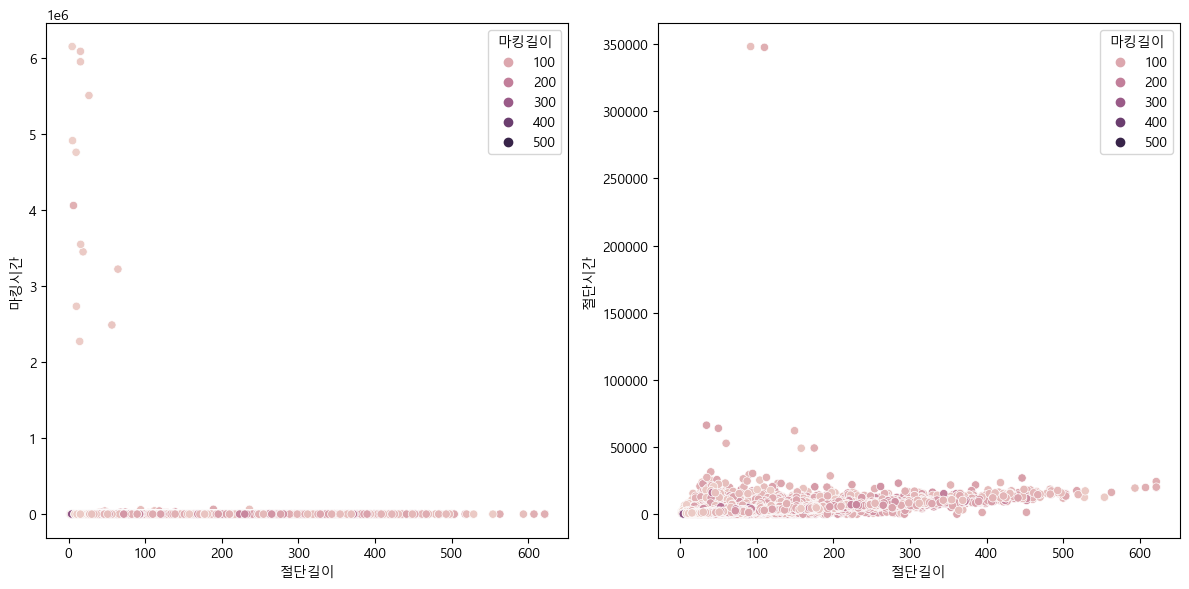

In [6]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x = '절단길이', y = '마킹시간', hue = '마킹길이', data = train)

plt.subplot(1, 2, 2)
sns.scatterplot(x = '절단길이', y = '절단시간', hue = '마킹길이', data = train)

# plt.subplot(1, 3, 3)
# sns.scatterplot(x = '마킹길이', y = '마킹시간', hue = '절단길이', data = train)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, len(train['X5'].unique())))

plt.subplot(1, 2, 1)
sns.boxplot(x='Y1', y='X5', data=train)

plt.subplot(1, 2, 2)
sns.boxplot(x='Y2', y='X5', data=train)

In [ ]:
plt.figure(figsize=(16, len(train['X7'].unique())))

plt.subplot(1, 2, 1)
sns.boxplot(x='Y1', y='X7', data=train)

plt.subplot(1, 2, 2)
sns.boxplot(x='Y2', y='X7', data=train)

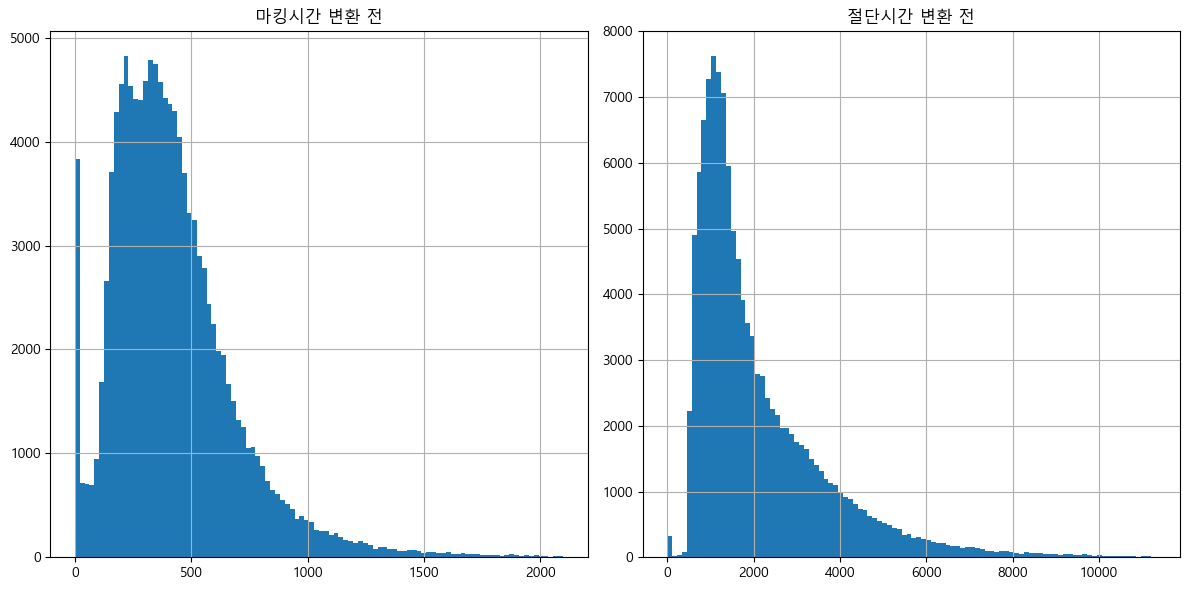

In [8]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
train['마킹시간'].hist(bins = 100)
plt.title('마킹시간 변환 전')

plt.subplot(1, 2, 2)
train['절단시간'].hist(bins = 100)
plt.title('절단시간 변환 전')

# plt.subplot(1, 2, 2)
# np.log1p(train['마킹시간']).hist(bins = 100)
# plt.title('마킹시간 변환 후')

# plt.subplot(1, 3, 3)
# transformed_data, _ = stats.boxcox(train['Y1'] + 1)
# plt.hist(transformed_data, bins = 100)
# plt.title('Box-Cox Transform Data')

plt.tight_layout()
plt.show()

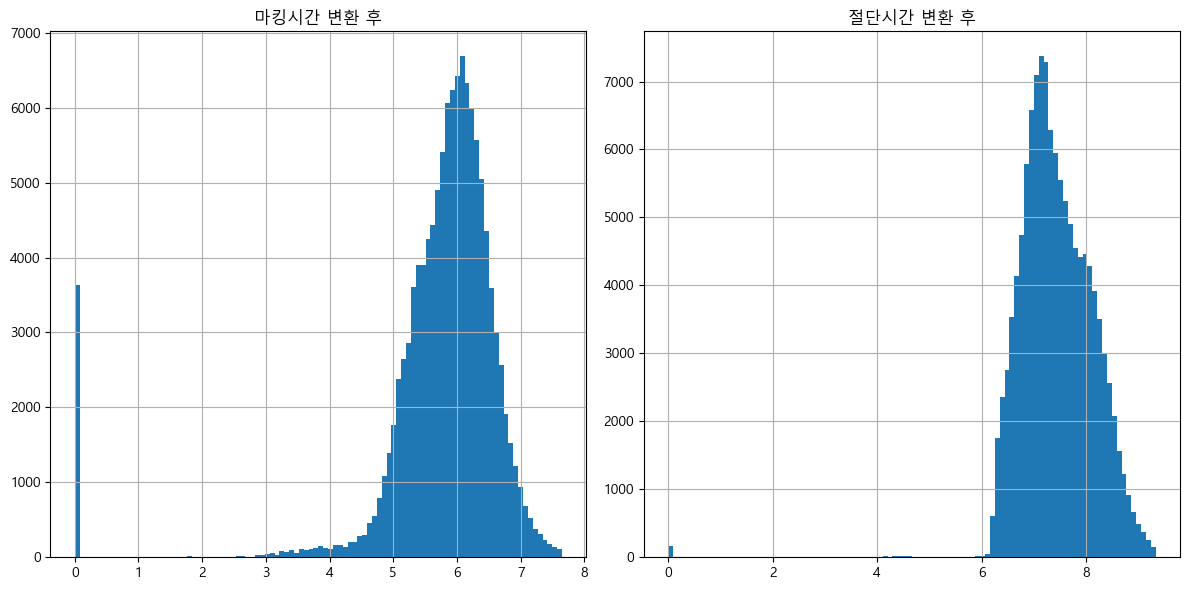

In [9]:
plt.figure(figsize = (12, 6))

# plt.subplot(1, 2, 1)
# train['절단시간'].hist(bins = 100)
# plt.title('절단시간 변환 전')

plt.subplot(1, 2, 1)
np.log1p(train['마킹시간']).hist(bins = 100)
plt.title('마킹시간 변환 후')

plt.subplot(1, 2, 2)
np.log1p(train['절단시간']).hist(bins = 100)
plt.title('절단시간 변환 후')

# plt.subplot(1, 3, 3)
# transformed_data, _ = stats.boxcox(train['Y2'] + 1)
# plt.hist(transformed_data, bins = 100)
# plt.title('Box-Cox Transform Data')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), vmax = 1, vmin = -1, annot = True)

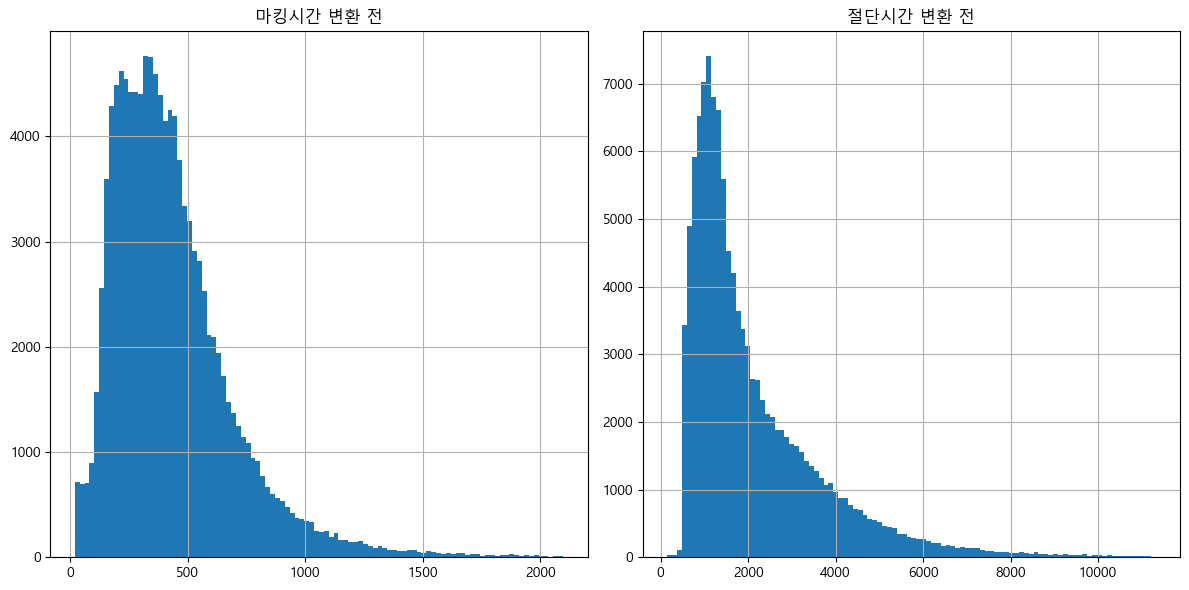

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train['마킹시간'].hist(bins=100)
plt.title('마킹시간 변환 전')

train = train[train['마킹시간'] != 0].reset_index(drop=True)

plt.subplot(1, 2, 2)
train['절단시간'].hist(bins=100)
plt.title('절단시간 변환 전')

train = train[train['절단시간'] != 0].reset_index(drop=True)

# plt.subplot(1, 2, 2)
# train['Y2_trans'] = np.log1p(train['절단시간'])
# train = train[(train['Y2_trans'] >= 5)].reset_index(drop=True)
# train['Y2_trans'].hist(bins=100)
# plt.title('절단시간 변환 후')

# plt.subplot(1, 2, 2)
# train['Y1_trans'] = np.log1p(train['마킹시간'])
# train = train[(train['Y1_trans'] >= 3)].reset_index(drop=True)
# train['Y1_trans'].hist(bins=100)
# plt.title('마킹시간 변환 후')

plt.tight_layout()
plt.show()

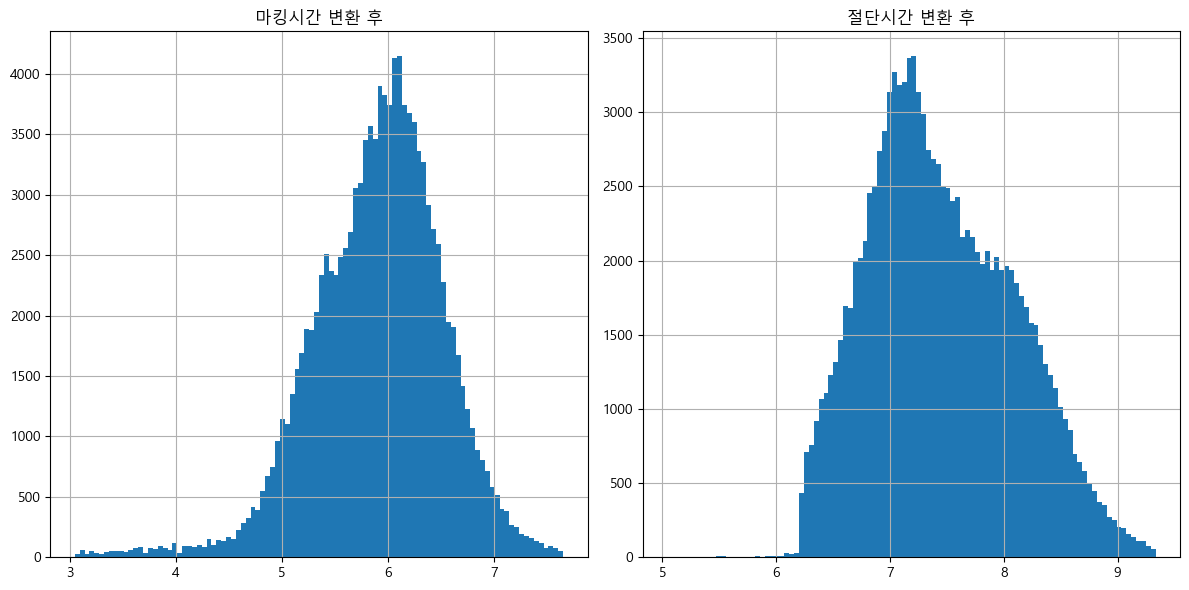

In [16]:
plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# train['절단시간'].hist(bins=100)
# plt.title('절단시간 변환 전')

plt.subplot(1, 2, 1)
train['Y1_trans'] = np.log1p(train['마킹시간'])
train = train[(train['Y1_trans'] >= 3)].reset_index(drop=True)
train['Y1_trans'].hist(bins=100)
plt.title('마킹시간 변환 후')

train = train[train['절단시간'] != 0].reset_index(drop=True)

plt.subplot(1, 2, 2)
train['Y2_trans'] = np.log1p(train['절단시간'])
train = train[(train['Y2_trans'] >= 5)].reset_index(drop=True)
train['Y2_trans'].hist(bins=100)
plt.title('절단시간 변환 후')

plt.tight_layout()
plt.show()